In [2]:
import shap
import keras
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, Reshape, Flatten, Input, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# stationary forcing 
input_data = np.load('data/input_sal_temp_ns.npy')
output_data = np.load('data/output_sal_temp_ns.npy')

In [4]:
X_train = input_data[0:60000]
y_train = output_data[0:60000]
X_val = input_data[60000:80000]
y_val = output_data[60000:80000]
X_test = input_data[80000:100000]
y_test = output_data[80000:100000] 

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.mean_,scaler.scale_

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
input_scaled = scaler.transform(input_data)

Y_train = keras.utils.to_categorical(y_train)
Y_val = keras.utils.to_categorical(y_val)
Y_test = keras.utils.to_categorical(y_test)

In [6]:
train_sample = shap.sample(X_train_scaled, 500, random_state=42)
background_data = shap.kmeans(X_train_scaled, 50)
input_sample = shap.sample(input_scaled, 1000, random_state=42)
shap_values_list = []

In [8]:
for i in range(10):
    
    print(i)
    
    model = Sequential()
    model.add(Dense(12, input_dim=5, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.load_weights('models_mlp_ns/ensemble_member_'+str(i)+'.keras')
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    explainer = shap.KernelExplainer(model.predict, background_data, feature_names=['Time', 'Salinity', 'Temperature', 'Freshwater forcing', 'Temperature forcing'])
    shap_values = explainer.shap_values(input_sample)
    shap_values_list.append(shap_values)    

0
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

47/47 [==============================] - 0s 853us/step


1/1 [==============================] - 0s 15ms/step


47/47 [==============================] - 0s 824us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 811us/step


1/1 [==============================] - 0s 16ms/step


47/47 [==============================] - 0s 817us/step


1/1 [==============================] - 0s 15ms/step


47/47 [==============================] - 0s 832us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 765us/step


1/1 [==============================] - 0s 16ms/step


47/47 [==============================] - 0s 907us/step


47/47 [==============================] - 0s 912us/step
1
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 889us/step


1/1 [==============================] - 0s 16ms/step


47/47 [==============================] - 0s 878us/step


1/1 [==============================] - 0s 17ms/step


47/47 [==============================] - 0s 849us/step


1/1 [==============================] - 0s 19ms/step


47/47 [==============================] - 0s 833us/step


1/1 [==============================] - 0s 17ms/step


47/47 [==============================] - 0s 823us/step


1/1 [==============================] - 0s 15ms/step


47/47 [==============================] - 0s 856us/step


1/1 [==============================] - 0s 15ms/step


47/47 [==============================] - 0s 890us/step
2
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


47/47 [==============================] - 0s 678us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 847us/step


1/1 [==============================] - 0s 16ms/step


47/47 [==============================] - 0s 761us/step


1/1 [==============================] - 0s 15ms/step


47/47 [==============================] - 0s 948us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 817us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 798us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 868us/step
3
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 794us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 806us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 838us/step


1/1 [==============================] - 0s 17ms/step


47/47 [==============================] - 0s 816us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 835us/step


1/1 [==============================] - 0s 15ms/step


47/47 [==============================] - 0s 813us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 789us/step
4
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 789us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 786us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 777us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 719us/step


1/1 [==============================] - 0s 15ms/step


47/47 [==============================] - 0s 763us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 790us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 736us/step
5
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 895us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 743us/step


1/1 [==============================] - 0s 15ms/step


47/47 [==============================] - 0s 715us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 697us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 814us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 817us/step


1/1 [==============================] - 0s 16ms/step


47/47 [==============================] - 0s 699us/step
6
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


47/47 [==============================] - 0s 750us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 815us/step


1/1 [==============================] - 0s 16ms/step


47/47 [==============================] - 0s 786us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 766us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 858us/step


1/1 [==============================] - 0s 15ms/step


47/47 [==============================] - 0s 801us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 878us/step
7
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 760us/step


1/1 [==============================] - 0s 17ms/step


47/47 [==============================] - 0s 753us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 845us/step


1/1 [==============================] - 0s 15ms/step


47/47 [==============================] - 0s 635us/step


1/1 [==============================] - 0s 18ms/step


47/47 [==============================] - 0s 708us/step


1/1 [==============================] - 0s 15ms/step


47/47 [==============================] - 0s 698us/step


1/1 [==============================] - 0s 15ms/step


47/47 [==============================] - 0s 890us/step
8
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 13ms/step


47/47 [==============================] - 0s 784us/step


1/1 [==============================] - 0s 15ms/step


47/47 [==============================] - 0s 763us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 753us/step


1/1 [==============================] - 0s 15ms/step


47/47 [==============================] - 0s 799us/step


1/1 [==============================] - 0s 16ms/step


47/47 [==============================] - 0s 738us/step


1/1 [==============================] - 0s 17ms/step


47/47 [==============================] - 0s 672us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 786us/step
9
2/2 [==============================] - 0s 2ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 767us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 749us/step


1/1 [==============================] - 0s 16ms/step


47/47 [==============================] - 0s 764us/step


1/1 [==============================] - 0s 15ms/step


47/47 [==============================] - 0s 716us/step


1/1 [==============================] - 0s 16ms/step


47/47 [==============================] - 0s 744us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 710us/step


1/1 [==============================] - 0s 14ms/step


47/47 [==============================] - 0s 654us/step


In [9]:
shap_values_list_np = np.array(shap_values_list)

In [10]:
np.save('shap_vals/mlp_nonstationary', shap_values_list_np)

In [12]:
#shap_values_list_np = np.load('shap_vals/mlp_nonstationary.npy')
shap_values_mean = np.mean(shap_values_list_np, axis=0).reshape(1000, 5)

In [18]:
transformed_X = scaler.inverse_transform(input_sample)
qvals = []
alpha=0.2; 
beta=0.8; 
k=1e9
for x in transformed_X: 
    DeltaT = x[2]
    DeltaS = x[1]
    qvals.append(-k*(-alpha*DeltaT + beta*DeltaS))

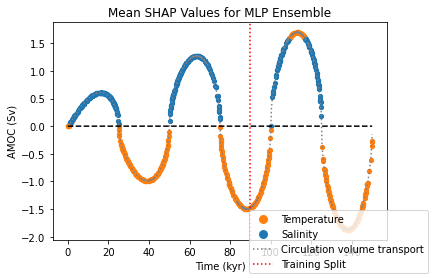

In [21]:
fig, ax = plt.subplots()
for i in range(1000):
    # temp > salinity => orange 
    if shap_values_mean[i, 2] > shap_values_mean[i, 1]:
        ax.scatter(transformed_X[i, 0], -k*(-alpha*transformed_X[i, 2] + beta*transformed_X[i, 1])/1e9, marker='o', s=18, color='#ff7f0e')
    else:
        ax.scatter(transformed_X[i, 0], -k*(-alpha*transformed_X[i, 2] + beta*transformed_X[i, 1])/1e9, marker='o', s=18, color='#1f77b4')

ax.set_xlabel('Time (kyr)');
ax.set_ylabel('AMOC (Sv)');
#ax.set_title('Dependency of Model Prediction on Temperature and Salinity');
ax.set_title('Mean SHAP Values for MLP Ensemble');

q = np.load('data/q_sal_temp_ns.npy')
ax.plot(input_data[:, 0], q/1e10, linestyle=':', color='grey')
ax.plot(input_data[:, 0], input_data[:, 0]*0, 'k--')
#ax.axvline(input_data[60000][0], color='red', linestyle='dotted', label='Training Split');

# Define custom legend labels and colors (0 corresponds to one color, 1 to another)
legend_labels = ['Temperature', 'Salinity', 'Circulation volume transport', 'Training Split']  # Custom labels
colors = ['#ff7f0e', '#1f77b4']  # Corresponding colors for the categories

# Create custom legend handles
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
grey_line_handle = plt.Line2D([0], [0], linestyle=':', color='grey')
red_line_handle = plt.axvline(input_data[60000][0], color='red', linestyle='dotted');
legend_handles.append(grey_line_handle)
legend_handles.append(red_line_handle)

# Add the custom legend to the plot
fig.legend(legend_handles, legend_labels, loc='lower right');

plt.savefig('figures/shap_mlp_nonstationary_mean', dpi=100)

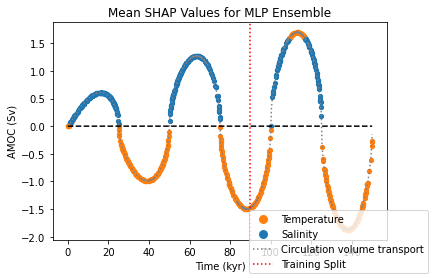

In [20]:
fig

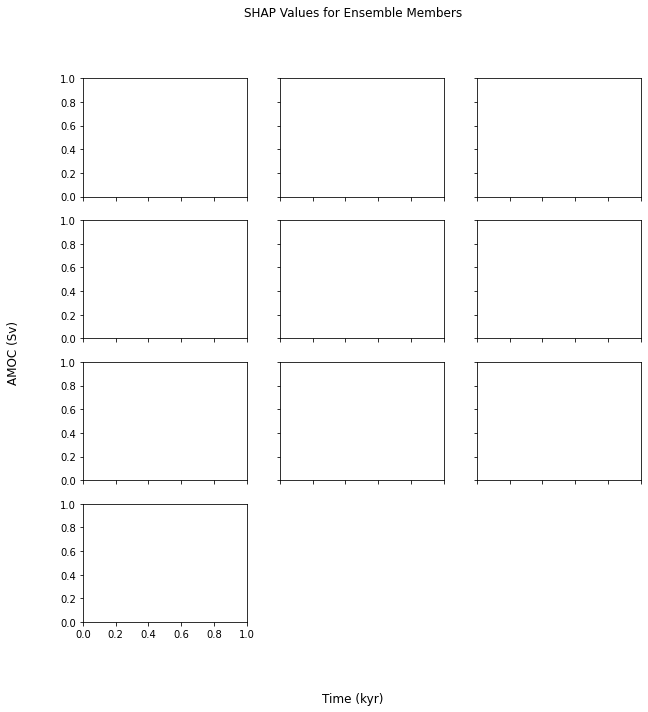

In [37]:
fig, ax = plt.subplots(4, 3, sharex = True, sharey = True, figsize = (10, 10))
fig.supxlabel('Time (kyr)')
fig.supylabel('AMOC (Sv)')
fig.suptitle('SHAP Values for Ensemble Members')
ax = ax.flatten()
for j in range(10, 12):  # 2 extra subplots in the 4x3 grid
    ax[j].axis('off')

In [38]:
shap_ensembles = shap_values_list_np.reshape(10, 1000, 5)

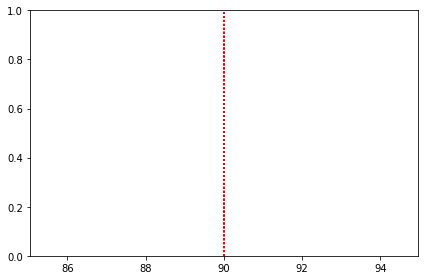

In [40]:
for j in range(10):
    for i in range(1000):
        # temp > salinity => orange 
        if shap_ensembles[j][i, 2] > shap_ensembles[j][i, 1]:
            ax[j].scatter(transformed_X[i, 0], -k*(-alpha*transformed_X[i, 2] + beta*transformed_X[i, 1])/1e9, marker='o', s=18, color='#ff7f0e')
        else:
            ax[j].scatter(transformed_X[i, 0], -k*(-alpha*transformed_X[i, 2] + beta*transformed_X[i, 1])/1e9, marker='o', s=18, color='#1f77b4')

    #ax[j].set_xlabel('Time (kyr)');
    #ax[j].set_ylabel('AMOC (Sv)');
    #ax.set_title('Dependency of Model Prediction on Temperature and Salinity');
    ax[j].set_title('Ensemble Member #' + str(j));

    q = np.load('data/q_sal_temp_ns.npy')
    ax[j].plot(input_data[:, 0], q/1e10, linestyle=':', color='grey')
    ax[j].plot(input_data[:, 0], input_data[:, 0]*0, 'k--')
    ax[j].axvline(input_data[60000][0], color='red', linestyle='dotted', label='Training Split');

    # Define custom legend labels and colors (0 corresponds to one color, 1 to another)
    legend_labels = ['Temperature', 'Salinity', 'Circulation volume transport', 'Training Split']  # Custom labels
    colors = ['#ff7f0e', '#1f77b4']  # Corresponding colors for the categories

    # Create custom legend handles
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
    grey_line_handle = plt.Line2D([0], [0], linestyle=':', color='grey')
    red_line_handle = plt.axvline(input_data[60000][0], color='red', linestyle='dotted');
    legend_handles.append(grey_line_handle)
    legend_handles.append(red_line_handle)

    # Add the custom legend to the plot
    fig.legend(legend_handles, legend_labels, loc='lower right', bbox_to_anchor=(0.9, 0.2));
    plt.tight_layout()

    fig.savefig('figures/shap_mlp_nonstationary_ensemble', dpi=100)

In [36]:
fig

KeyboardInterrupt: 